## ДЗ2 часть 2
### Такташева Катя, БКЛ182

Для работы я выбрала данные pymorphy, но для начала решила немного по-другому сохранить их для удобства, поэтому заново создаем список словарей lemmas_pm.

Импортируем нужные модули:

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

Считываем книгу:

In [2]:
with open('book.txt', 'r', encoding='utf-8') as fid:
    text = fid.read()

Парсим слова:

In [3]:
tokens = word_tokenize(text)
lemmas = []
for token in tokens:
    lemma = morph.parse(token)
    lemmas.append(lemma)

Создаем список словарей нудного вида:

In [24]:
lemmas_pm = []
for i in range(len(lemmas)):
    wordform = lemmas[i][0]  # сохраняем только первый вариант разбора
    lemmas_pm.append({'wordform': wordform.word,
                      'normal_form': wordform.normal_form,
                      'pos': wordform.tag.POS,
                      'case': wordform.tag.case,
                      'number': wordform.tag.number,
                      'gender': wordform.tag.gender,
                      'animacy': wordform.tag.animacy,
                      'aspect': wordform.tag.aspect,
                      'involvement': wordform.tag.involvement,
                      'mood': wordform.tag.mood,
                      'person': wordform.tag.person,
                      'tense': wordform.tag.tense,
                      'transitivity': wordform.tag.transitivity,
                      'voice ': wordform.tag.voice
                     }
                    )

### Задание 1: Датафрейм
Импортируем модуль pandas:

In [25]:
import pandas as pd

Преобразуем данные в датафрейм и напечатаем:

In [26]:
df = pd.DataFrame(lemmas_pm).fillna('')
df

,wordform,normal_form,pos,case,number,gender,animacy,aspect,involvement,mood,person,tense,transitivity,voice
0,глава,глава,NOUN,nomn,sing,masc,anim,,,,,,,
1,первая,один,ADJF,nomn,sing,femn,,,,,,,,
2,хоть,хоть,CONJ,,,,,,,,,,,
3,и,и,CONJ,,,,,,,,,,,
4,не,не,PRCL,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116333,скверную,скверный,ADJF,accs,sing,femn,,,,,,,,
116334,книгу,книга,NOUN,accs,sing,femn,inan,,,,,,,
116335,и,и,CONJ,,,,,,,,,,,
116336,копай,копать,VERB,,sing,,,impf,excl,impr,,,tran,


### Задание 2: Графики
Импортируем нужные модули:

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
%matplotlib inline

#### Гистограмма
Посмотрим среднюю длину леммы в тексте.

Создадим новый датасет:

In [28]:
df2 = df[
    ['normal_form', 'pos', 'gender']
        ].groupby(['normal_form', 'pos'],
                  as_index=False).count()
df2.columns = ['normal_form', 'pos', 'total']
df2 = df2[df2['total'] > 10]

Построим график:

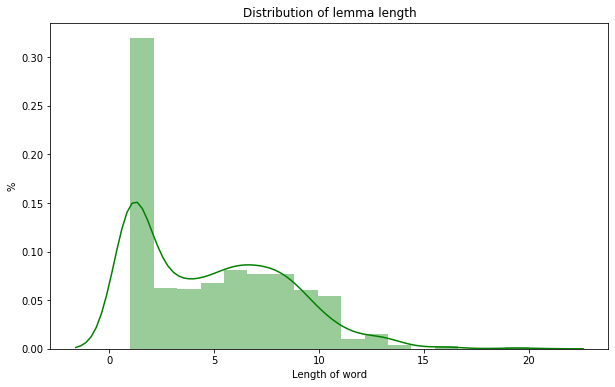

In [29]:
df2['length'] = df['normal_form'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df2['length'], bins=17, color='green')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');

#### Bar-chart
Посмотрим на самые частотные союзы. 

Создадим список союзов:

In [30]:
conj_list = []
for word in lemmas_pm:
    if word['pos'] == 'CONJ':
        conj_list.append(word['normal_form'])

Найдем 10 самых частотных из них и разделим на два списка: слова и кол-во их употреблений:

In [31]:
counter = Counter(conj_list).most_common(10)
words_c = []
counts_c = []
for word in counter:
    words_c.append(word[0])
    counts_c.append(word[1])

Построим график:

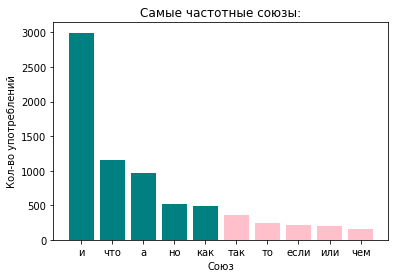

In [32]:
plt.bar(words_c[0:5], counts_c[0:5], color='teal');
plt.bar(words_c[5:], counts_c[5:], color='pink');
plt.title('Самые частотные союзы:')
plt.xlabel('Союз')
plt.ylabel('Кол-во употреблений');

#### Pie-chart
Посмотрим на потребление некоторых самых частотных глаголов детектива.

Создадим список глаголов:

In [33]:
verb_list = []
for word in lemmas_pm:
    if word['pos'] == 'VERB':
        verb_list.append(word['normal_form'])

Найдем 10 самых частотных из них и разделим на два списка: слова и кол-во их употреблений:

In [34]:
counter = Counter(verb_list).most_common(10)
words_v = []
counts_v = []
for word in counter:
    words_v.append(word[0])
    counts_v.append(word[1])

Построим график:

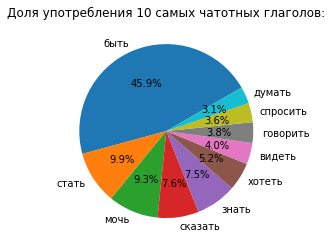

In [35]:
plt.pie(counts_v, labels=words_v, startangle=30, autopct='%1.1f%%');
plt.title('Доля употребления 10 самых чатотных глаголов:');

### Задание 3: свои графики

#### Простой график: от любви до ненависти
Посмотрим на частоту употребления слов "любовь" и "ненависть" на каждые 10000 слов книги. По оси X у нас промежутки текста (каждые 10000 слов), на оси Y - доля их употребления

In [36]:
x1 = []
y1 = []
y2 = []
j = 0
for i in range(1, (len(lemmas_pm)//10000)+2):
    counter1 = 0
    counter2 = 0
    for word in lemmas_pm[j:(i*10000)+1]:
        if word['normal_form'] == 'любовь':
            counter1 += 1
        if word['normal_form'] == 'ненависть':
            counter2 += 1
    j += 10000
    x1.append(i*10000)
    y1.append(counter1/(i*10000))
    y2.append(counter2/(i*10000))

Построим график:

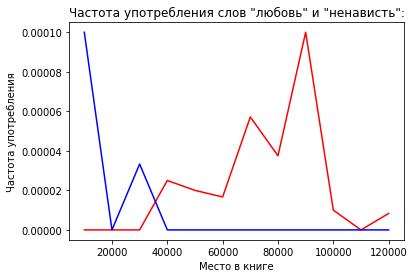

In [37]:
plt.plot(x1, y1, color='red');
plt.plot(x1, y2, color='blue');
plt.title('Частота употребления слов "любовь" и "ненависть":')
plt.xlabel('Место в книге')
plt.ylabel('Частота употребления');

#### Wordcloud cloud
Посмотрим на самые частотные существительные в тексте: построим wordcloud в форме облачка

Импортируем все необходимые модули:

In [38]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

Создадим маску, загрузив нужное изображение:

In [39]:
mask = np.array(Image.open('mask-cloud.png'))

Отсортируем слова:

In [40]:
text = ' '.join(word['normal_form'] for word in lemmas_pm
                if word['pos'] == 'NOUN')

Нарисуем облако:

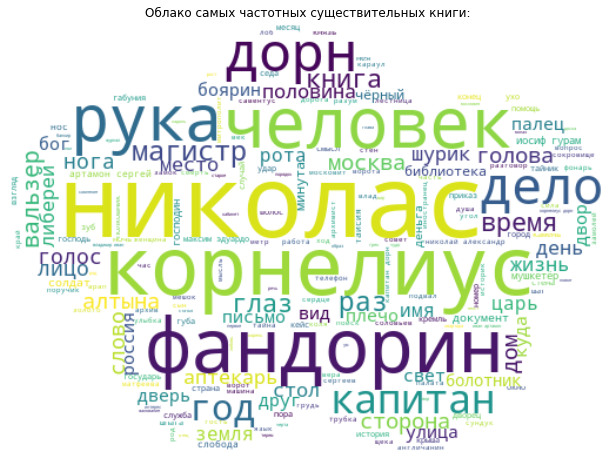

In [41]:
wordcloud = WordCloud(background_color='white',
                      width=1300,
                      height=800,
                      mask=mask
                     ).generate(text);
plt.figure(figsize=(13, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Облако самых частотных существительных книги:');

### Задание 4: Dispersion plot

In [42]:
from nltk import draw

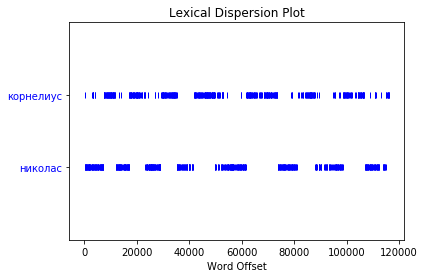

In [43]:
words = ['корнелиус', 'николас']
draw.dispersion.dispersion_plot(df['normal_form'], 
                                words, ignore_case=False, 
                                title="Lexical Dispersion Plot")